# util (remove before presentation)

1. Introduction: motivate the problem, review the literature on the topic

2. Background: sometimes you need to review a fair amount of technical background material before you can start discussing the main results. You can do this in a “background” section. Often this is not needed.

3. Theory: state the model you are solving (if not in 2), describe the numerical method, state and prove any theoretical results about the method (correctness, error estimates, …). 

4. Numerics: describe numerical experiments and numerical results designed to illustrate the theory from Sec. 3

5. Conclusion: usually a paragraph to 1/2 page, review what the main messages of the paper are, highlight where your analysis still falls short.

In [1]:
#run before presentation
include("math405.jl")

# for only head title
## for section
### for subsection
#### for subsubsection

#An important technique to accelerate convergence of sequences. 
#Introduce extrapolation in general, specifically Richardson, give examples of use-case. 

# Richardson Extrapolation

by Group 4 (Ivan Gao, xxx, xxx)

## Introduction

### Extrapolation vs Interpolation

**Extrapolation** refers to estimating an unknown value based on extending a known sequence of values or facts. 

**Interpolation** refers to estimating a value within two known values that exist within a sequence of values.

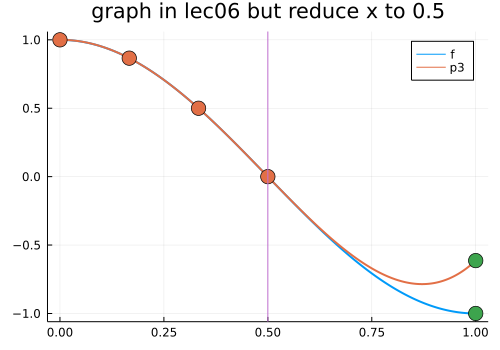

In [2]:
#compute the coefficients of the interpolating polynomial
get_coeffs(X, F) =  [ x^n for x in X, n=0:length(X) ] \ F

f = x -> cos(pi*x)
N = 3   # try N = 5, 10, 20 
X = range(0, 0.5, length=N+1)
a = get_coeffs(X, f.(X))

xp = range(0, 1, length=300)
plot(xp, f.(xp), lw=2, label = "f", size=(500, 350))
plot!(xp, evalpoly.(xp, Ref(a)), lw=2, label = "p$(N)")
scatter!(X, f.(X), ms=8, c =  2, label = "")
scatter!([1, 1], [f.(1), evalpoly.(1, Ref(a))], ms=8, c =  3, label = "")
vline!([0.5], c = 4, label = "")
title!("graph in lec06 but reduce x to 0.5")

### Why do we need Extrapolation?

### intuition of Richardson Extrapolation?

## Richardson Extrapolation

A sequence acceleration method used to improve the rate of convergence of a sequence of estimates of some value

Taylor expansion:

$$
    u(x+h) = u(x) + h u'(x) + \frac{h^2}{2} u''(x) + \frac{h^3}{6} u'''(x) + \frac{h^4}{24} u^{(iv)}(\xi)
$$

drop $O(h^2)$ gives:

$$
u(x+h) = u(x) + hu'(x)
$$

## Application:

### The Romberg Integration
which applies Richardson extrapolation to the trapezoid rule.

### The Bulirsch–Stoer Algorithm
for solving ordinary differential equations.

### The Romberg Integration

## Bulirsch-Stoer Method

It has been known as able to obtain high-accuracy solutions to ordinary differential equations with minimal computational effort.

### Assumptions
1. Function is smooth.
2. Function have no singular points inside the interval of integration.

If any vialation, turn to Runge-Kutta with adaptive step size method

### Three Big Ideas

1. Richardson’s deferred approach to the limit. (Already Discussed in Romberg integration)

2. The strength of rational function extrapolation in Richardson-type applications.

3. use a method whose error function is strictly even

### How does it work

1. Each singal Bulirsch-Stoer steps takes us from x to x + H, H is supposed to be quite large distance.

2. Then that single step is a grand leap consisting of many, dozens to hundreds) substeps of modified midpoint methods, which are then extrapolated to zero stepsize.

#### note: 
The number n of the substep used to be $$n = 2, 4, 6, 8, 12, 16, 24, 32, 48, 64, 96 \dots n_j = 2n_{j-2}$$ as proposed by **Bulirsch and Stoer**. But more recent work by **Deuflhard** suggests that the sequence $$n = 2, 4, 6, \dots, n_j = 2j$$ is usually more efficient.

![Bulirsch-Stoer_Algorithm](Bulirsch-Stoer_Algorithm.png)

## Conclusion

#### ref

http://phys.uri.edu/nigh/NumRec/bookfpdf/f16-4.pdf